/tmp/ipykernel_8730/2838150682.py:41: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/lee/work/CP/cp_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


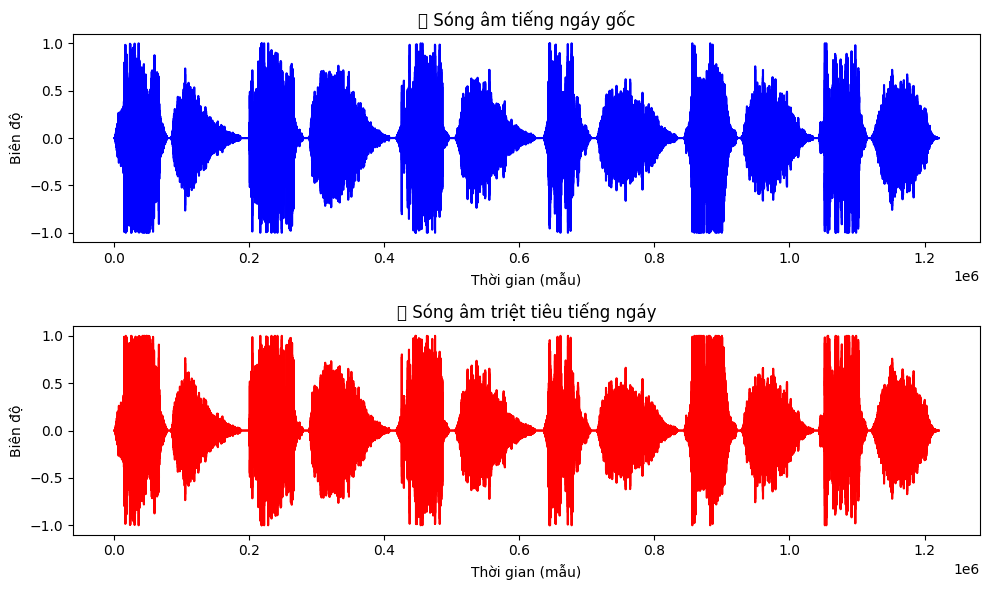

✅ Hoàn thành! Kiểm tra xem ANC có hoạt động tốt không.


In [4]:
import numpy as np
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt

# 1️⃣ Đọc file tiếng ngáy
file_path = "test_sound/long_duration_test.wav"  # Thay bằng đường dẫn file của bạn
snoring_sound, fs = sf.read(file_path)

# 2️⃣ Xử lý tín hiệu - Tạo sóng ngược pha
delay_samples = 50  # Số mẫu trễ (tạo sóng ngược pha)
anti_noise = np.roll(snoring_sound, delay_samples) * -1  # Đảo pha 180 độ

# 3️⃣ Phát lại âm thanh gốc & âm thanh triệt tiêu
# print("🔊 Đang phát âm thanh gốc...")
# sd.play(snoring_sound, samplerate=fs)
# sd.wait()

# print("🔊 Đang phát âm thanh triệt tiêu...")
# sd.play(anti_noise, samplerate=fs)
# sd.wait()

# 4️⃣ Vẽ hai đồ thị riêng biệt
plt.figure(figsize=(10, 6))

# Biểu đồ 1: Sóng âm tiếng ngáy gốc
plt.subplot(2, 1, 1)
plt.plot(snoring_sound, color='blue')
plt.title("📊 Sóng âm tiếng ngáy gốc")
plt.xlabel("Thời gian (mẫu)")
plt.ylabel("Biên độ")

# Biểu đồ 2: Sóng âm triệt tiêu tiếng ngáy
plt.subplot(2, 1, 2)
plt.plot(anti_noise, color='red')
plt.title("📊 Sóng âm triệt tiêu tiếng ngáy")
plt.xlabel("Thời gian (mẫu)")
plt.ylabel("Biên độ")

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

print("✅ Hoàn thành! Kiểm tra xem ANC có hoạt động tốt không.") 


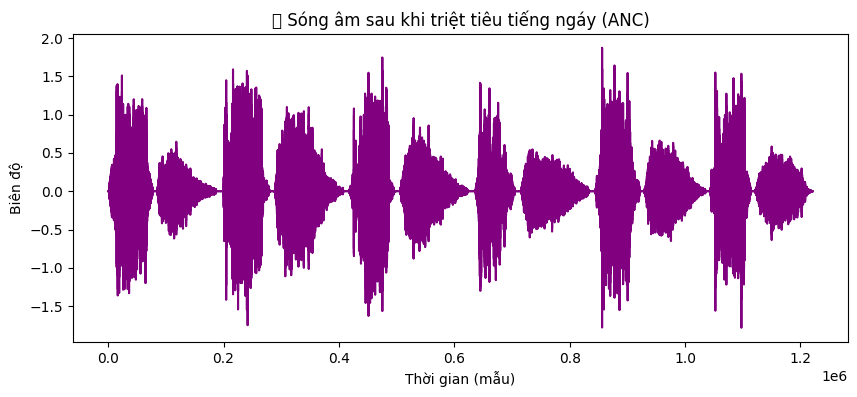

✅ Hoàn thành! Kiểm tra xem ANC có hoạt động tốt không.


In [ ]:
import numpy as np
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt

# 1️⃣ Đọc file tiếng ngáy
file_path = "test_sound/long_duration_test.wav"  # Thay bằng đường dẫn file của bạn
snoring_sound, fs = sf.read(file_path)

# 2️⃣ Xử lý tín hiệu - Tạo sóng ngược pha
delay_samples = 50  # Số mẫu trễ (tạo sóng ngược pha)
anti_noise = np.roll(snoring_sound, delay_samples) * -1  # Đảo pha 180 độ

# 3️⃣ Triệt tiêu tiếng ngáy bằng cách cộng 2 tín hiệu
output_sound = snoring_sound + anti_noise

# 4️⃣ Phát lại âm thanh triệt tiêu
# print("🔊 Đang phát âm thanh sau khi triệt tiêu...")
# sd.play(output_sound, samplerate=fs)
# sd.wait()

# 5️⃣ Vẽ biểu đồ tín hiệu sau triệt tiêu
plt.figure(figsize=(10, 4))
plt.plot(output_sound, color='purple')
plt.title("📊 Sóng âm sau khi triệt tiêu tiếng ngáy (ANC)")
plt.xlabel("Thời gian (mẫu)")
plt.ylabel("Biên độ")
plt.show()

print("✅ Hoàn thành! Kiểm tra xem ANC có hoạt động tốt không.") 


In [14]:
import numpy as np
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy.signal import hilbert

def lms_filter(noise_signal, reference_signal, mu=0.05, filter_order=200):
    """Bộ lọc thích nghi LMS với kiểm tra lỗi kích thước"""
    n = len(noise_signal)
    
    # Kiểm tra kích thước tín hiệu, nếu quá nhỏ thì báo lỗi sớm
    if n < filter_order:
        raise ValueError(f"⚠ Lỗi: Số lượng mẫu ({n}) nhỏ hơn filter_order ({filter_order})!")

    output = np.zeros(n, dtype=np.float32)
    error_signal = np.zeros(n, dtype=np.float32)
    weights = np.zeros(filter_order, dtype=np.float32)

    for i in range(filter_order, n):
        x = reference_signal[i - filter_order:i]  
        if len(x) < filter_order:
            x = np.pad(x, (filter_order - len(x), 0), mode='constant')

        y = np.dot(weights, x)
        error_signal[i] = noise_signal[i] - y
        weights += 2 * mu * error_signal[i] * x  

    return error_signal  

# 1️⃣ Đọc file tiếng ngáy
file_path = "test_sound/long_duration_test.wav"
snoring_sound, fs = sf.read(file_path)

# Đảm bảo tín hiệu là 1D (mono) và kiểu dữ liệu float32
if len(snoring_sound.shape) > 1:
    snoring_sound = snoring_sound[:, 0]
snoring_sound = snoring_sound.astype(np.float32)

# 2️⃣ Tạo tín hiệu phản pha chính xác bằng Hilbert
anti_noise = np.imag(hilbert(snoring_sound)) * -1

# 3️⃣ Kiểm tra kích thước của tín hiệu trước khi áp dụng LMS
if len(snoring_sound) < 2000:
    raise ValueError("⚠ Tín hiệu quá ngắn, cần tín hiệu dài hơn 2000 mẫu để hoạt động hiệu quả!")

# 4️⃣ Áp dụng Adaptive LMS Filter với thông số cải tiến
output_sound = lms_filter(snoring_sound, anti_noise, mu=0.05, filter_order=200)

# 5️⃣ Phát lại âm thanh triệt tiêu
print("🔊 Đang phát âm thanh sau khi triệt tiêu mạnh mẽ hơn...")
sd.play(output_sound, samplerate=fs)
sd.wait()

# 6️⃣ Vẽ đồ thị kết quả
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(snoring_sound, color='blue')
plt.title("📊 Sóng âm tiếng ngáy gốc")
plt.xlabel("Thời gian (mẫu)")
plt.ylabel("Biên độ")

plt.subplot(2, 1, 2)
plt.plot(output_sound, color='green')
plt.title("📊 Sóng âm sau khi triệt tiêu bằng Adaptive Filtering (Cải tiến)")
plt.xlabel("Thời gian (mẫu)")
plt.ylabel("Biên độ")

plt.tight_layout()
plt.show()

print("✅ Hoàn thành! Kiểm tra xem tiếng ngáy đã giảm đáng kể chưa.") 


🔊 Đang phát âm thanh sau khi triệt tiêu mạnh mẽ hơn...


KeyboardInterrupt: 